## Polyglot Jupyter Notebook: Conference Contributions per Country

#### Scraping the conference data from a web table using `ruby's nokogiri` library

In [1]:
%polyglot ruby

require "nokogiri"; require "open-uri"
url = "https://2018.splashcon.org/people-index" # "https://2019.programming-conference.org/people-index"
doc = Nokogiri::HTML(open(url))
$rows = doc.css("#results-table .row").map { |row| row.css("div").map(&:content) }
$rows.length

998

#### Compiling a list of all contributing countries using `python's pycountry` library

In [2]:
%polyglot python

import pycountry

countries = [c.name for c in pycountry.countries for row in rows if c.name in str(row[2]) or c.name in str(row[1])]
len(countries)

576

#### Plotting the conference contributions per country using `R's ggplot2` library

In [3]:
%polyglot R

library(ggplot2)

values <- data.frame(contributors = countries)
data <- aggregate(x = values, by = list(countries = values$contributors), FUN = length)

svg()
plt <- ggplot(data, aes(x = reorder(countries, +contributors), contributors)) +
  geom_bar(stat = "identity") + xlab("") + ylab("") + coord_flip() +
  geom_hline(aes(yintercept = mean(contributors)))
print(plt)
svg <- svg.off()

#### Display `ggplot2's` svg code

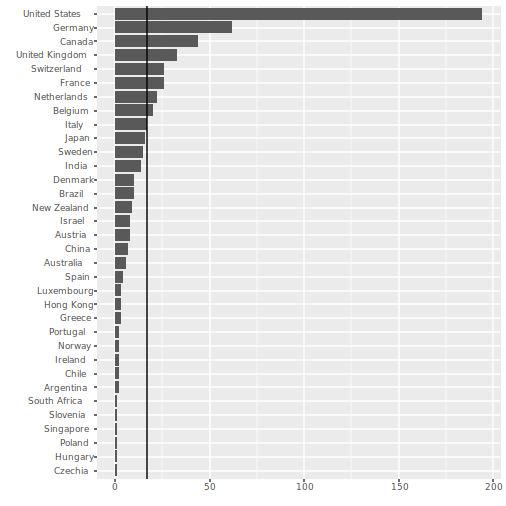

In [4]:
%polyglot js

$$.svg(svg)